In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
df=pd.read_csv('Star_dwarf_classification.csv')

# Exploring Data

In [131]:
df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   SpType       3642 non-null   object 
 5   Amag         3642 non-null   float64
 6   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 185.0+ KB


In [133]:
df.isna().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

In [134]:
df['TargetClass'].value_counts()

1    1821
0    1821
Name: TargetClass, dtype: int64

In [135]:
df.corr()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
Vmag,1.000000,-0.169203,0.328024,-0.063602,0.334796,0.264425
Plx,-0.169203,1.000000,0.076106,-0.084149,0.505025,0.294217
e_Plx,0.328024,0.076106,1.000000,-0.037010,0.221271,0.165012
B-V,-0.063602,-0.084149,-0.037010,1.000000,-0.310483,-0.616440
Amag,0.334796,0.505025,0.221271,-0.310483,1.000000,0.579413
TargetClass,0.264425,0.294217,0.165012,-0.616440,0.579413,1.000000


In [136]:
df.describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,8.120530,7.606153,1.176568,0.827077,16.427388,0.500000
std,1.338875,11.924052,0.919999,0.436699,2.428144,0.500069
min,0.450000,-6.820000,0.470000,-0.196000,2.820000,0.000000
25%,7.370000,2.740000,0.840000,0.487250,15.150312,0.000000
50%,8.390000,4.950000,1.040000,0.867000,16.392485,0.500000
75%,9.060000,8.670000,1.270000,1.136000,18.029836,1.000000
max,12.490000,280.270000,30.290000,2.530000,29.249165,1.000000


# Visualizing Data

In [137]:
import seaborn as sns

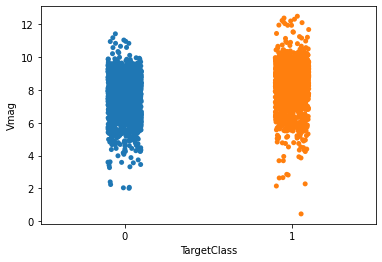

In [138]:
sns.stripplot(x='TargetClass',y='Vmag',data=df);

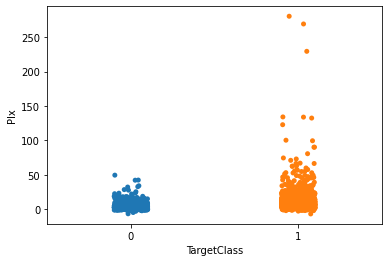

In [139]:
sns.stripplot(x='TargetClass',y='Plx',data=df);

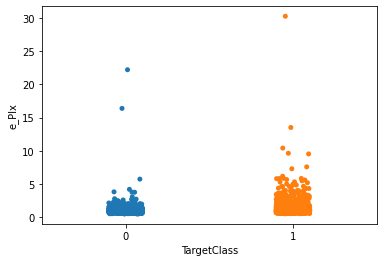

In [140]:
sns.stripplot(x='TargetClass',y='e_Plx',data=df);

<AxesSubplot:xlabel='TargetClass', ylabel='B-V'>

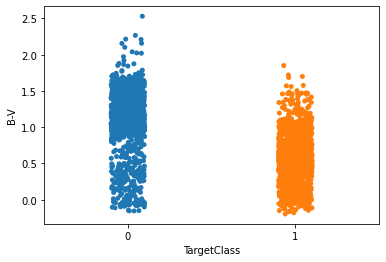

In [141]:
sns.stripplot(x='TargetClass',y='B-V',data=df)

In [142]:
# sns.stripplot(x='TargertClass',y='Amag',data=df);

In [155]:
X=df.iloc[:,[0,1,2,3,5]].values
y=df.iloc[:,-1].values
print(X.shape,y.shape)

(3642, 5) (3642,)


In [156]:

# np.set_printoptions(suppress=True)

In [157]:
# from sklearn.preprocessing import LabelEncoder

In [158]:
# le=LabelEncoder()
# X[:,4]=le.fit_transform(X[:,4])
# X

In [159]:
from sklearn.preprocessing import StandardScaler

In [166]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [167]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer


# ct = ColumnTransformer(
#         [('ohe', OneHotEncoder(categories='auto'),[4])],  
#         remainder = 'passthrough'
#         )

# X=ct.fit_transform(X)
# print(X.shape)

In [172]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y ,
                                               test_size= 0.2, 
                                               random_state=123 )

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2913, 5) (729, 5) (2913,) (729,)


In [169]:
X[0]

array([-1.59150176,  0.51364147, -0.64853326,  1.12432301,  0.10337062])

In [164]:
from sklearn.linear_model import LogisticRegression 

In [171]:
model=LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8916323731138546

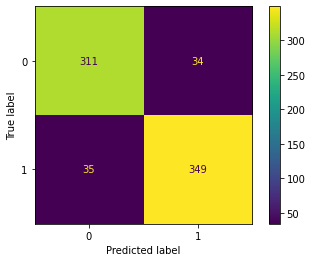

In [175]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test);

In [176]:
from sklearn.metrics import classification_report

In [177]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       345
           1       0.91      0.91      0.91       384

    accuracy                           0.91       729
   macro avg       0.91      0.91      0.91       729
weighted avg       0.91      0.91      0.91       729



In [178]:
confusion_matrix(y_test,model.predict(X_test))

array([[311,  34],
       [ 35, 349]], dtype=int64)

In [179]:
from sklearn.metrics import plot_roc_curve

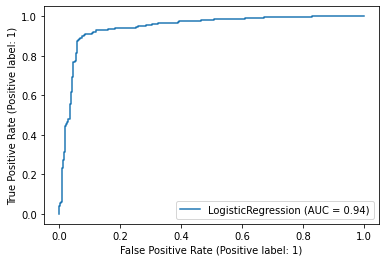

In [180]:
plot_roc_curve(model,X_test,y_test)

In [185]:
sample_test1=[[5.99,13.73,0.58,1.318,16.67835]]

In [186]:
model.predict(sc.transform(sample_test1))
# belong to class 0 means dwarf

array([0], dtype=int64)